# **Project 7: Anomaly Detection in Network Traffic**

## **📝 Description:**

*Detects anomalies in network traffic data to identify potential security threats or unusual activity. Use unsupervised learning techniques like clustering or autoencoders. Visualize normal vs. anomalous traffic patterns.*

## **🔧 Project Structure:**

1. **🧠 Define the Problem:** Understand the objective and type of problem (classification, regression, etc.).
2. **🗂️ Collect and Prepare Data:** Obtain the dataset, handle missing values, and preprocess data.
3. **📊 Exploratory Data Analysis (EDA):** Visualize data to understand patterns and correlations.
4. **📐 Feature Engineering:** Select and create relevant features.
5. **🔀 Split the Data:** Divide the dataset into training and testing sets.
6. **🤖 Choose a Model:** Select a suitable machine learning algorithm.
7. **🏋️ Train the Model:** Train the model using the training set.
8. **📈 Evaluate the Model:** Use appropriate metrics to evaluate the model on the test set.
9. **🔧 Improve the Model:** Tune hyperparameters, try different algorithms, or enhance features.
10. **🚀 Deploy the Model (optional):** Create an application or API to make predictions using the trained model.

##  **🧪 I’ll experiment with:**

#  **1. 🧠 Define the Problem**

## **Objective:** Detect anomalies in network traffic volume (Network In) using unsupervised learning.

## **Type:** Anomaly Detection (Unsupervised)

## **Data Source: [Kaggle Dataset/Numenta Anomaly Benchmark (NAB)](https://www.kaggle.com/datasets/boltzmannbrain/nab/data?select=realKnownCause)**

## ec2_network_in_257a54.csv

## **Import Libraries**
- **pandas:** Used for data manipulation and analysis (like creating tables).
- **numpy**: Used for numerical operations (like calculations).
- **matplotlib.pyplot:** Used for creating basic plots and visualizations.
- **seaborn:** Used for creating more advanced and visually appealing plots.
- **sklearn.preprocessing.StandardScaler:** Used to standardize the data.
- **sklearn.cluster.KMeans:** Used for K-Means clustering to finding clusters of similar data points.
- **sklearn.ensemble.IsolationForest:** Used for anomaly detection.
- **sklearn.metrics.silhouette_score:** Used to evaluating clusters, but in this specific code not used.
- **sklearn.decomposition.PCA:** Used for reducing the number of features, but in this specific code not used.
- **tensorflow.keras.models.Sequential, tensorflow.keras.layers.Dense, tensorflow.keras.optimizers.Adam:** Used for creating and training neural networks, but in this specific code not used.
- **sklearn.model_selection.train_test_split:** Used for splitting data into training and testing sets.
- **os:** Used for interacting with the operating system (like checking if a file exists).
- **warnings:** Used to manage warnings.
- **statsmodels.tsa.seasonal.seasonal_decompose:** Used to decompose a time series into its trend, seasonal, and residual components.
- **pandas.plotting.autocorrelation_plot:** Used to create an autocorrelation plot.
- **sklearn.model_selection.GridSearchCV:** Used to find the best hyperparameters for the Isolation Forest model.
- **sklearn.metrics.make_scorer, sklearn.metrics.f1_score:** Used for creating a custom scorer for anomaly detection.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.ensemble import IsolationForest
from sklearn.metrics import silhouette_score, f1_score, make_scorer
from sklearn.decomposition import PCA
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
import os
#import gc

import warnings
warnings.filterwarnings("ignore")

## **📥 Read the CSV Files**

- **Load the Data:** Reads your network traffic data from a CSV file into a table-like structure called a DataFrame.
- **Check File:** Verifies that the file exists before attempting to load it, exiting if the file is not there.
- **Display and Describe:** Shows the first few rows of the data, some basic information about the data types of each column, and summary statistics (like mean, standard deviation, etc.).

In [5]:
# Load data directly from the provided dictionary of filepaths
data_path = 'ec2_network_in_257a54.csv'

#check the existense of the file on the current working directory, on Google Colab
print(os.listdir())


['ec2_network_in_257a54.csv', '.DS_Store', 'deployment.py', 'scaler.joblib', 'Anomaly_Detection_Training.ipynb', 'isolation_forest_model.joblib', '.ipynb_checkpoints', 'Anomaly_Detection_in_Network_Traffic.ipynb', '.git']


In [6]:
# Load the data
try:
    df = pd.read_csv(data_path, nrows=1000)  # Limit rows for initial testing
except FileNotFoundError:
    print(f"Error: The file '{data_path}' was not found.  Please ensure the file is in the correct directory.")
    exit()  # Exit the program if the file is not found


In [7]:
print(f"Shape of merged dataframe: {df.shape}")
df.head().style.background_gradient(cmap='gist_rainbow')

Shape of merged dataframe: (1000, 2)


,timestamp,value
0,2014-04-10 00:04:00,251643.000000
1,2014-04-10 00:09:00,3203510.000000
2,2014-04-10 00:14:00,287397.000000
3,2014-04-10 00:19:00,238944.000000
4,2014-04-10 00:24:00,245880.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   timestamp  1000 non-null   object 
 1   value      1000 non-null   float64
dtypes: float64(1), object(1)
memory usage: 15.8+ KB


In [9]:
df.describe().style.background_gradient(cmap='gist_rainbow')

,value
count,1000.000000
mean,769790.097000
std,1130265.339136
min,162030.000000
25%,239868.000000
50%,249965.500000
75%,267539.000000
max,4206500.000000


# **2. 🗂️Collect and Prepare Data**
- **Rename Columns:** Changes the names of the columns to be more descriptive and easier to work with.
- **Convert Timestamp:** Transforms the 'Timestamp' column into a proper datetime format so you can work with time-based operations.
- **Set Index:** Sets the 'Timestamp' column as the index of the DataFrame, making it easier to analyze data over time.
- **Handle Missing Values:** Fills in any missing values in the 'network_in' column with the average value of that column.

In [10]:
# Rename columns for easier handling
df.rename(columns={'value': 'network_in', 'timestamp': 'Timestamp'}, inplace=True)


In [11]:
# Convert 'Timestamp' to datetime objects
df['Timestamp'] = pd.to_datetime(df['Timestamp'])


In [12]:
# Set 'Timestamp' as index
df.set_index('Timestamp', inplace=True)

In [13]:
# Handle Missing Values (Impute with mean if any exist)
df = df.fillna(df['network_in'].mean())

# **3. 📊 Exploratory Data Analysis (EDA)**


## **3.1. Visualize Time Series**
- Creates a line graph showing how the `network_in` traffic changes over time.

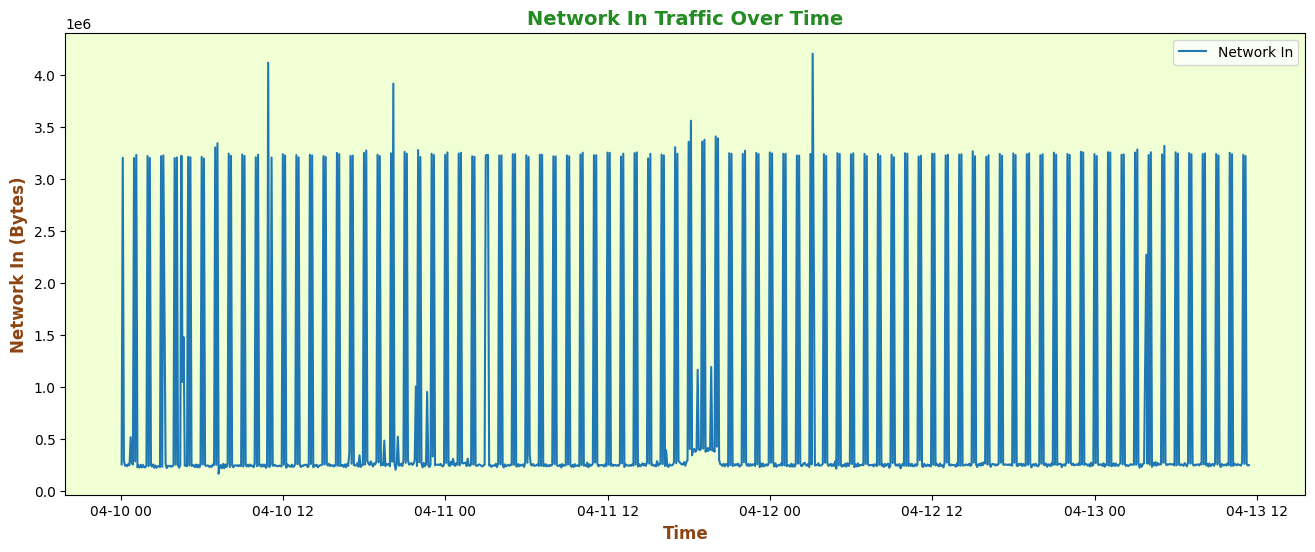

In [14]:
# Visualize the time series data
plt.figure(figsize=(16, 6))
plt.plot(df['network_in'], label='Network In')
plt.title('Network In Traffic Over Time', fontsize = 14, fontweight = 'bold', color = 'forestgreen')
plt.xlabel('Time',fontsize = 12, fontweight = 'bold', color = 'saddlebrown')
plt.ylabel('Network In (Bytes)',fontsize = 12, fontweight = 'bold', color = 'saddlebrown')
plt.gca().set_facecolor('#f1ffd4')
plt.legend()
plt.show()

## **3.2. Distribution of Network In Traffic:**
- Shows a histogram and density curve of the `network_in` data, which helps you understand the distribution of traffic volumes.

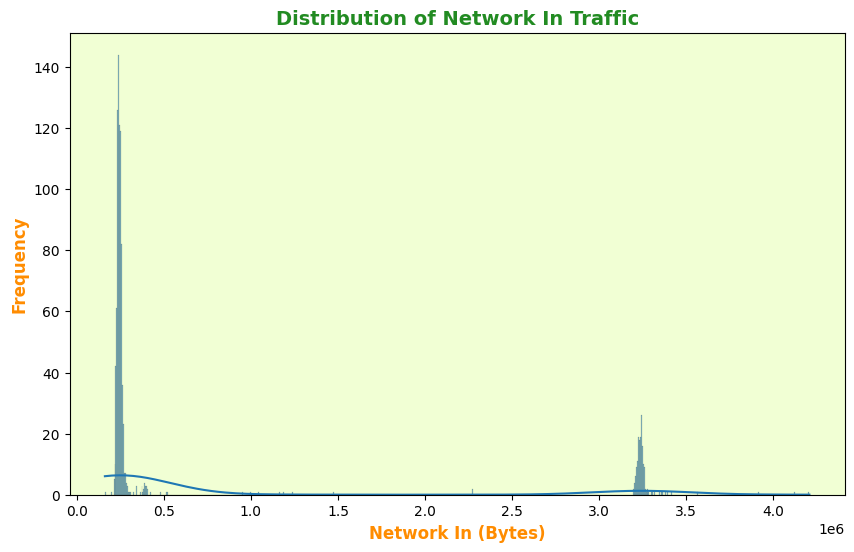

In [15]:
# Distribution of Network In traffic
plt.figure(figsize=(10, 6))
sns.histplot(df['network_in'], kde=True)
plt.title('Distribution of Network In Traffic', fontsize = 14, fontweight = 'bold', color = 'forestgreen')
plt.xlabel('Network In (Bytes)',fontsize = 12, fontweight = 'bold', color = 'darkorange')
plt.ylabel('Frequency',fontsize = 12, fontweight = 'bold', color = 'darkorange')
plt.gca().set_facecolor('#f1ffd4')
plt.show()

## 3.3. **Boxplot:**
- Displays a boxplot of the `network_in` data. This helps you visually identify potential outliers.

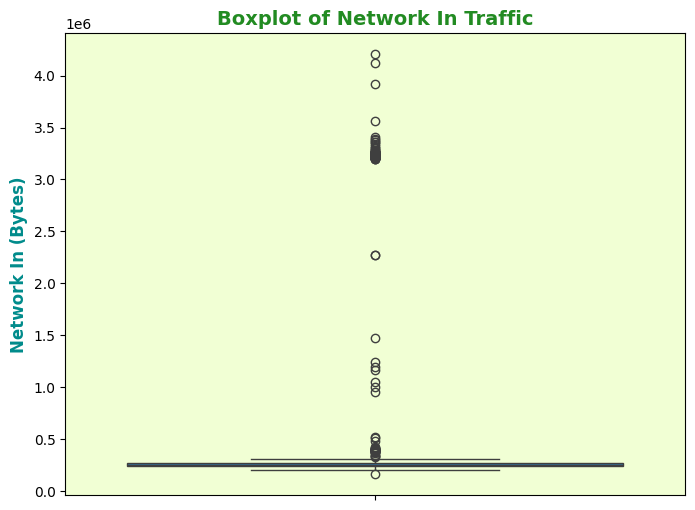

In [16]:
# Boxplot to identify potential outliers
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['network_in'])
plt.title('Boxplot of Network In Traffic', fontsize = 14, fontweight = 'bold', color = 'forestgreen')
plt.ylabel('Network In (Bytes)',fontsize = 12, fontweight = 'bold', color = 'darkcyan')
plt.gca().set_facecolor('#f1ffd4')
plt.show()


## **3.4. Time Series Decomposition:**
- Breaks down the time series data into its trend, seasonal, and residual components.

Decomposition - Trend Head:
 Timestamp
2014-04-10 00:04:00   NaN
2014-04-10 00:09:00   NaN
2014-04-10 00:14:00   NaN
2014-04-10 00:19:00   NaN
2014-04-10 00:24:00   NaN
Name: trend, dtype: float64
Decomposition - Seasonal Head:
 Timestamp
2014-04-10 00:04:00    2.420444e+06
2014-04-10 00:09:00   -4.460702e+05
2014-04-10 00:14:00   -5.189746e+05
2014-04-10 00:19:00   -5.190079e+05
2014-04-10 00:24:00   -4.371799e+05
Name: seasonal, dtype: float64
Decomposition - Residual Head:
 Timestamp
2014-04-10 00:04:00   NaN
2014-04-10 00:09:00   NaN
2014-04-10 00:14:00   NaN
2014-04-10 00:19:00   NaN
2014-04-10 00:24:00   NaN
Name: resid, dtype: float64


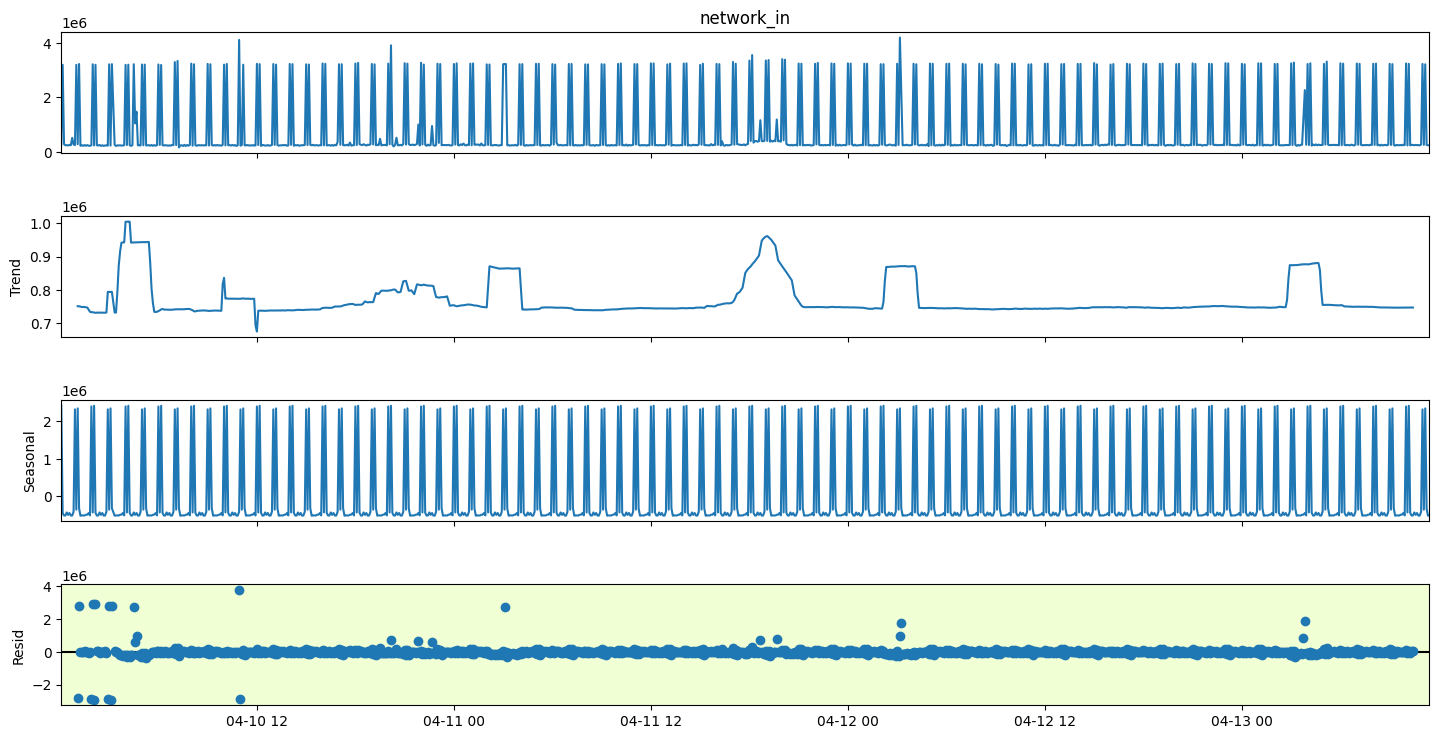

In [17]:
# Time series decomposition (optional, but useful for understanding trends and seasonality)
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df['network_in'], model='additive', period=24)  # Assuming daily seasonality
print("Decomposition - Trend Head:\n", decomposition.trend.head())
print("Decomposition - Seasonal Head:\n", decomposition.seasonal.head())
print("Decomposition - Residual Head:\n", decomposition.resid.head())
fig = decomposition.plot()
fig.set_size_inches(16, 8)
plt.gca().set_facecolor('#f1ffd4')
plt.show()

## **3.5. Autocorrelation Plot:**
- Shows how the `network_in` traffic is correlated with its past values.

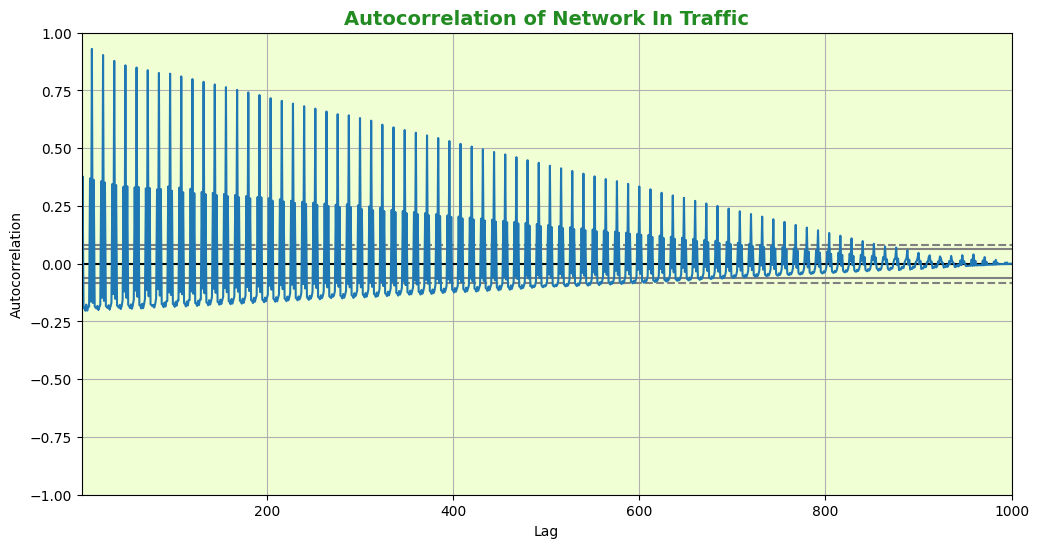

In [18]:
# Autocorrelation plot to identify temporal dependencies
from pandas.plotting import autocorrelation_plot
plt.figure(figsize=(12, 6))
autocorrelation_plot(df['network_in'])
plt.title('Autocorrelation of Network In Traffic', fontsize = 14, fontweight = 'bold', color = 'forestgreen')
plt.gca().set_facecolor('#f1ffd4')
plt.show()


## **3.6. Rolling Statistics:**
- Calculates and plots the rolling mean and standard deviation of the `network_in` traffic.

Rolling Mean Head:
 Timestamp
2014-04-10 00:04:00   NaN
2014-04-10 00:09:00   NaN
2014-04-10 00:14:00   NaN
2014-04-10 00:19:00   NaN
2014-04-10 00:24:00   NaN
Name: network_in, dtype: float64
Rolling Std Head:
 Timestamp
2014-04-10 00:04:00   NaN
2014-04-10 00:09:00   NaN
2014-04-10 00:14:00   NaN
2014-04-10 00:19:00   NaN
2014-04-10 00:24:00   NaN
Name: network_in, dtype: float64


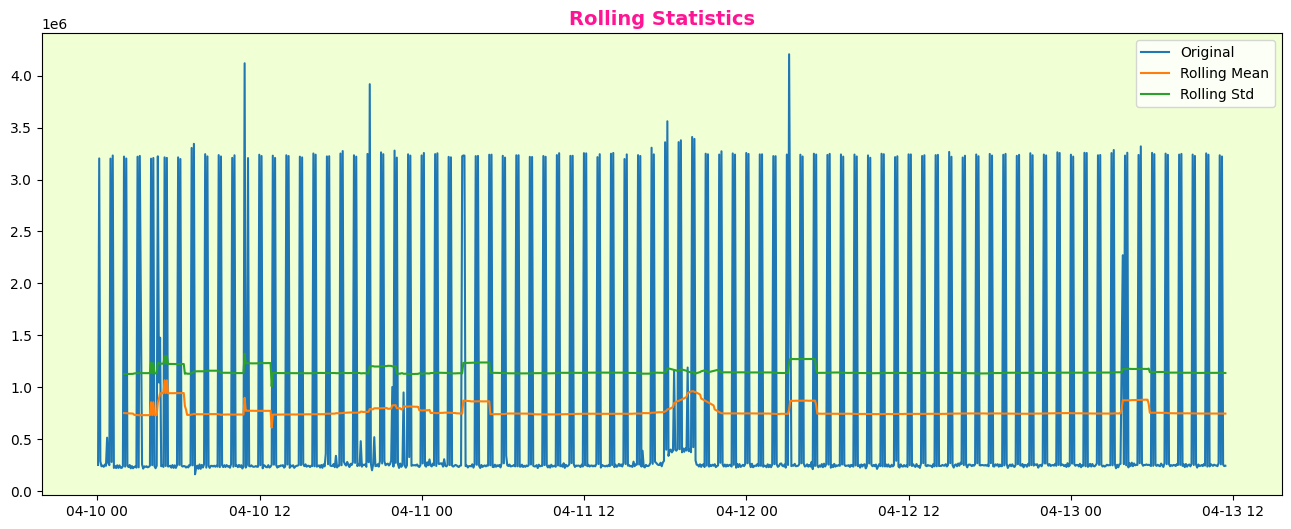

In [19]:
# Rolling Statistics
rolling_mean = df['network_in'].rolling(window=24).mean()
rolling_std = df['network_in'].rolling(window=24).std()
print("Rolling Mean Head:\n", rolling_mean.head())
print("Rolling Std Head:\n", rolling_std.head())
plt.figure(figsize=(16,6))
plt.plot(df['network_in'], label='Original')
plt.plot(rolling_mean, label='Rolling Mean')
plt.plot(rolling_std, label = 'Rolling Std')
plt.legend()
plt.title('Rolling Statistics',fontsize = 14, fontweight = 'bold', color = 'deeppink')
plt.gca().set_facecolor('#f1ffd4')
plt.show()

# **4. 📐 Feature Engineering**

- **Scale Data:** Standardizes the 'network_in' data so it has a mean of 0 and a standard deviation of 1. This helps the anomaly detection model perform better.
- **Create Lagged Features:** Creates new columns representing the past values of the 'network_in' traffic. These lagged features help the model learn temporal patterns.
- **Drop NaN Values:** Removes any rows with missing values that were created during the lagged feature creation process.

In [20]:
# Feature Engineering

#Scale data
scaler = StandardScaler()
df['network_in_scaled'] = scaler.fit_transform(df[['network_in']])

# Create lagged features (past values of network traffic)
for i in range(1, 5):  # Lag up to 5 time steps
    df[f'network_in_lag_{i}'] = df['network_in_scaled'].shift(i)

df.dropna(inplace=True)  # Drop rows with NaN due to shifting


# **5. 🔀 Split the Data**
- **Separate Features:** Creates a new DataFrame X containing only the features to be used for training, excluding the original `network_in` column.
- **Split Data into Training and Testing Sets:** Divides the data into two sets: a training set to train the model and a testing set to evaluate its performance. `shuffle=False` keeps the time series order.

In [21]:
# Split the Data

X = df.drop('network_in', axis=1)  # Features

X_train, X_test = train_test_split(X, test_size=0.2, shuffle=False) #Split maintaining temporal order

# **6. 🤖 Choose a Model**
- Isolation Forest is suitable for anomaly detection

# **7. 🏋️ Train the Model**
- **Initialize Isolation Forest:** Creates an Isolation Forest model with specified parameters.
- **Train the Model:** Fits the Isolation Forest model to the training data.

In [23]:
# Isolation Forest
model = IsolationForest(n_estimators=100, contamination='auto', random_state=42) #Setting contamination = 'auto' to automatic calculation
model.fit(X_train)


,n_estimators,100
,max_samples,'auto'
,contamination,'auto'
,max_features,1.0
,bootstrap,False
,n_jobs,None
,random_state,42
,verbose,0
,warm_start,False


# **8. 📈 Evaluate the Model**

- **Get Anomaly Scores:** Uses the trained model to calculate an anomaly score for each data point in the test set. Lower scores indicate a higher likelihood of being an anomaly.
- **Predict Anomalies:** Uses the model to predict whether each data point in the test set is normal (1) or an anomaly (-1).
- **Visualize Anomalies:** Creates a plot of the `network_in` traffic, highlighting the detected anomalies in red.
- **Zoom-in Visualization:** Creates a zoomed-in plot of the `network_in` traffic, highlighting the detected anomalies in red.
- **Threshold-Based Detection:** Sets a threshold based on the anomaly scores to classify data points as anomalies.

In [24]:
# Get anomaly scores on the test set
df_test = df.loc[X_test.index]
df_test['anomaly_score'] = model.decision_function(X_test)
df_test['anomaly'] = model.predict(X_test) # 1 for normal, -1 for anomaly

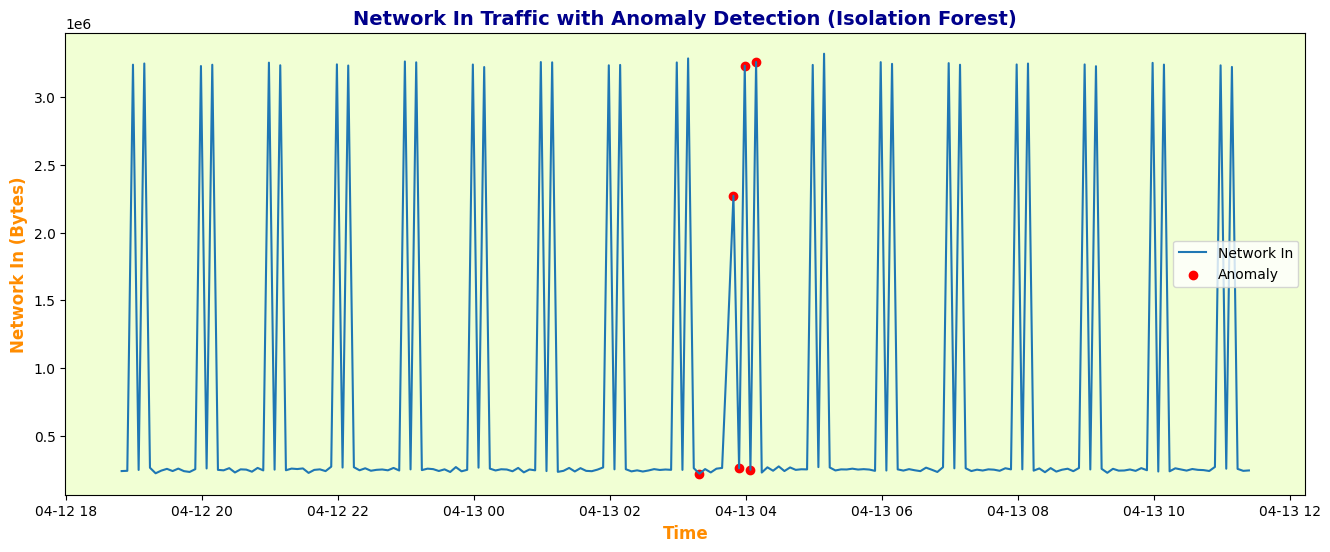

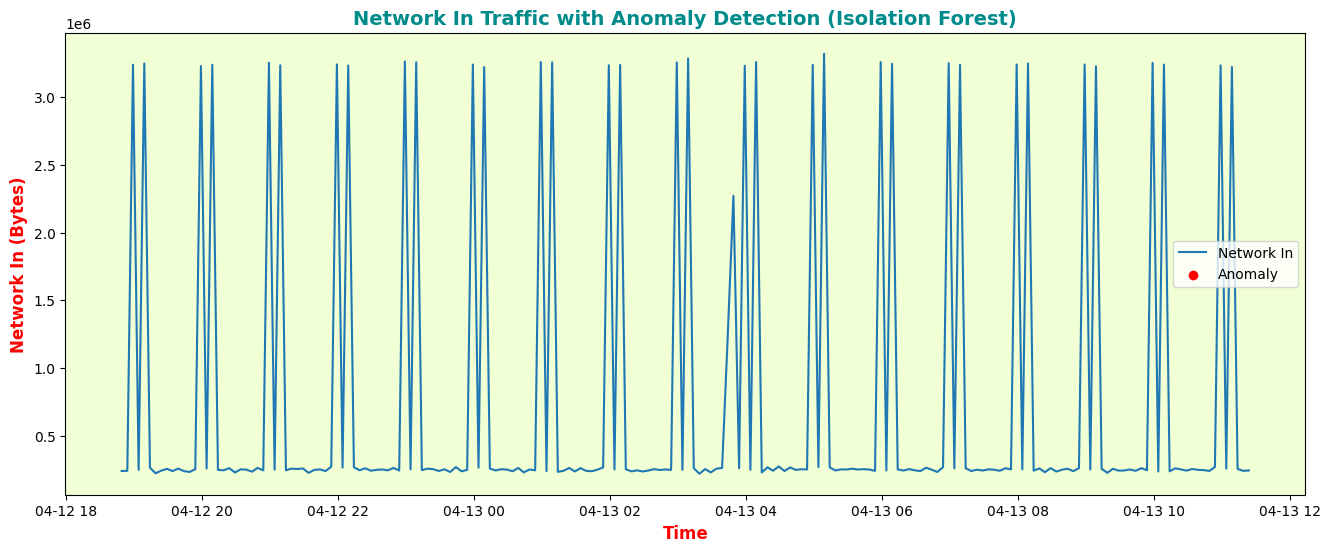

In [26]:
# Visualize anomalies
plt.figure(figsize=(16, 6))
plt.plot(df_test['network_in'], label='Network In')
plt.scatter(df_test.index[df_test['anomaly'] == -1], df_test['network_in'][df_test['anomaly'] == -1], color='red', label='Anomaly')
plt.title('Network In Traffic with Anomaly Detection (Isolation Forest)',fontsize = 14, fontweight = 'bold', color = 'darkblue')
plt.xlabel('Time',fontsize = 12, fontweight = 'bold', color = 'darkorange')
plt.ylabel('Network In (Bytes)',fontsize = 12, fontweight = 'bold', color = 'darkorange')
plt.gca().set_facecolor('#f1ffd4')
plt.legend()
plt.show()

#Zoom in
plt.figure(figsize=(16, 6))
plt.plot(df_test['network_in'].iloc[:1000], label='Network In')
plt.scatter(df_test.index[:100][df_test['anomaly'].iloc[:100] == -1], df_test['network_in'].iloc[:100][df_test['anomaly'].iloc[:100] == -1], color='red', label='Anomaly')
plt.title('Network In Traffic with Anomaly Detection (Isolation Forest)',fontsize = 14, fontweight = 'bold', color = 'darkcyan')
plt.xlabel('Time',fontsize = 12, fontweight = 'bold', color = 'red')
plt.ylabel('Network In (Bytes)',fontsize = 12, fontweight = 'bold', color = 'red')
plt.gca().set_facecolor('#f1ffd4')
plt.legend()
plt.show()



In [27]:
# Threshold-based anomaly detection (alternative evaluation)
threshold = df_test['anomaly_score'].quantile(0.05)  # Adjust quantile as needed
df_test['threshold_anomaly'] = df_test['anomaly_score'] < threshold


# **9. 🔧 Improve the Model**
- **Define Parameter Grid:** Sets up a grid of different hyperparameter values to test for the Isolation Forest model (number of estimators, contamination).
- **Create Custom Scorer:** Creates a custom scorer that considers -1 as the positive label for anomalies.
- **Perform Grid Search:** Uses GridSearchCV to find the best combination of hyperparameters based on cross-validation.
- **Evaluate Tuned Model:** After grid search, it identifies and evaluates the best model found during the process. The anomaly scores and predictions are generated based on the best model and plotted




In [28]:
from sklearn.model_selection import GridSearchCV

# Create a scorer that considers -1 as the positive label for anomalies
f1_scorer = make_scorer(f1_score, pos_label=-1)

param_grid = {
    'n_estimators': [50, 100, 150],
    'contamination': ['auto', 0.01, 0.05, 0.1]
}

# Use the f1_scorer for GridSearchCV
grid_search = GridSearchCV(IsolationForest(random_state=42), param_grid, scoring=f1_scorer, cv=3)
grid_search.fit(X_train)

best_model = grid_search.best_estimator_
print("Best parameters:", grid_search.best_params_)


Best parameters: {'contamination': 'auto', 'n_estimators': 50}


Anomaly Score Tuned Head:
 Timestamp
2014-04-12 18:49:00    0.156439
2014-04-12 18:54:00    0.162648
2014-04-12 18:59:00    0.081841
2014-04-12 19:04:00    0.072927
2014-04-12 19:09:00    0.042269
Name: anomaly_score_tuned, dtype: float64
Anomaly Predictions Tuned Head:
 Timestamp
2014-04-12 18:49:00    1
2014-04-12 18:54:00    1
2014-04-12 18:59:00    1
2014-04-12 19:04:00    1
2014-04-12 19:09:00    1
Name: anomaly_tuned, dtype: int64


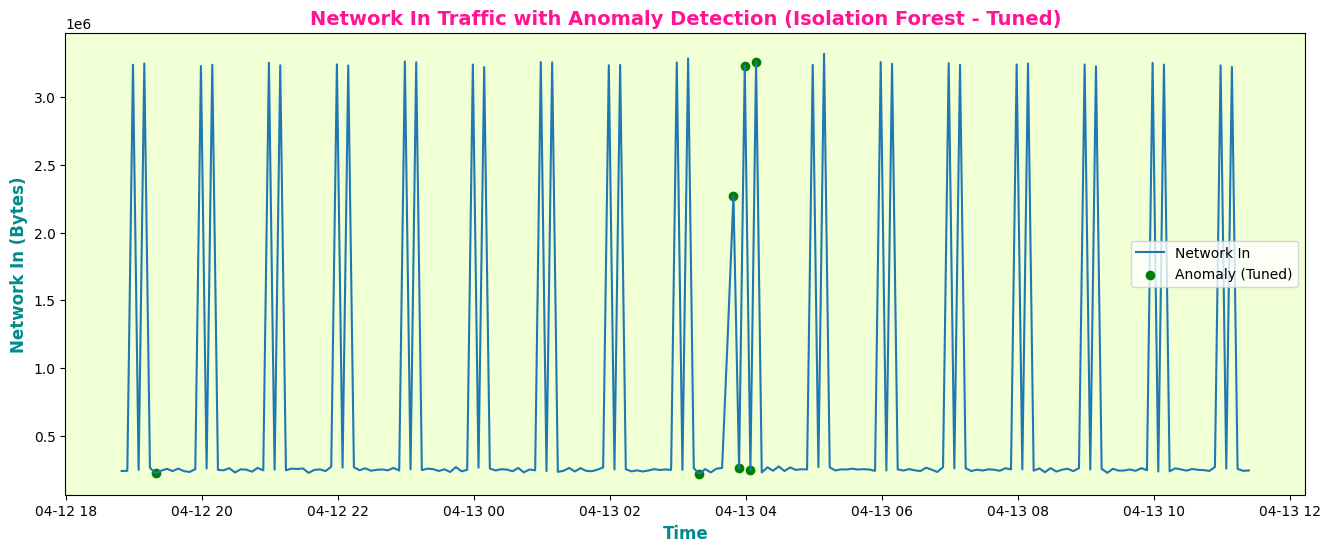

In [29]:
# Evaluate the best model
df_test['anomaly_score_tuned'] = best_model.decision_function(X_test)
df_test['anomaly_tuned'] = best_model.predict(X_test)
print("Anomaly Score Tuned Head:\n", df_test['anomaly_score_tuned'].head())
print("Anomaly Predictions Tuned Head:\n", df_test['anomaly_tuned'].head())

plt.figure(figsize=(16, 6))
plt.plot(df_test['network_in'], label='Network In')
plt.scatter(df_test.index[df_test['anomaly_tuned'] == -1], df_test['network_in'][df_test['anomaly_tuned'] == -1], color='green', label='Anomaly (Tuned)')
plt.title('Network In Traffic with Anomaly Detection (Isolation Forest - Tuned)',fontsize = 14, fontweight = 'bold', color = 'deeppink')
plt.xlabel('Time',fontsize = 12, fontweight = 'bold', color = 'darkcyan')
plt.ylabel('Network In (Bytes)',fontsize = 12, fontweight = 'bold', color = 'darkcyan')
plt.gca().set_facecolor('#f1ffd4')
plt.legend()
plt.show()


# **10. 🚀 Deploy the Model (optional)**

- Deployment means making your trained model available for use in a real-world scenario. It's about putting it into a system where it can analyze new network traffic data and flag potential anomalies in real-time or near real-time. This is highly dependent on where you want to use the model.

**Here's the general steps:**

**A. Choose a Deployment Environment:** Decide where the model will run. Some common choices include:
- **Cloud Platform (AWS, Azure, GCP):** Offers scalability, reliability, and various services for model deployment.
- **On-Premise Server:** Running the model on your own server within your organization.
- **Edge Device:** Deploying the model directly on network devices (routers, firewalls) for very low latency analysis (requires significant optimization).

**B. Save the Model:** Save the trained Isolation Forest model to a file. This allows you to load it later without retraining. The pickle library or joblib are common for this in Python.


In [30]:
import joblib
joblib.dump(best_model, 'isolation_forest_model.joblib')

['isolation_forest_model.joblib']

**C. Create an Inference Pipeline:** This is the code that takes new network traffic data as input, preprocesses it, feeds it to the model, and returns the anomaly detection results.
- **Load the Model:**

In [31]:
loaded_model = joblib.load('isolation_forest_model.joblib')

**D. Build an API (if needed):** If you want other applications or services to access your model, you'll typically create an API (Application Programming Interface). Frameworks like Flask or FastAPI in Python are commonly used for this.
- The API will expose an endpoint that accepts network traffic data, passes it to the inference pipeline, and returns the anomaly prediction.

**E. Data Ingestion:** Set up a system to feed new network traffic data to the model. This might involve:
- Reading data from a database.
- Listening to a message queue (like Kafka) where network traffic data is published.
- Receiving data directly from network monitoring tools.

**F. Monitoring and Logging:** Implement monitoring to track the model's performance and ensure it's still detecting anomalies accurately. Logging is crucial for debugging and auditing.

**G. Retraining:** Anomaly detection models can drift over time as network traffic patterns change. Plan to periodically retrain the model with new data to maintain its accuracy. This might involve an automated retraining pipeline.

## **see it on the deployment.py and Training.ipynb**


# **Conclusion**
We've built a system that can automatically detect unusual activity in network traffic. By using machine learning, specifically the Isolation Forest algorithm, we can identify patterns that deviate from the norm and flag them as potential anomalies. We started by understanding our data, preparing it for the model, and then training the model to recognize normal traffic patterns. After testing the model and fine-tuning it, we also explored how to make this anomaly detection system useful in a real-world setting.



# **Recommendations**
- **Deploy with Monitoring:** Putting this model into action can help quickly identify network problems. It is very important to continuously monitor the system to make sure it's still working accurately as traffic patterns change.
- **Retrain Regularly:** Network traffic changes over time, so the model needs to be retrained with new data regularly. Think of it like a doctor who needs to stay updated on the latest medical knowledge.
- **Invest in Deployment Infrastructure:** Use robust, scalable cloud platforms that allow for scaling.
- **Prioritize Data Security:** Safeguarding the network data used by this system is paramount. Implement proper security measures during deployment.